## Selecting our model

I will select suitable metrics that are appropriate for multi-class classification problems and have been used for similar tasks.
the metrics will  : 
 * accuracy score, 
 * confusion matrices (precision, recall, f1_score). 
 
I will fine tune the selection of performance measures depending on whether the distribution of outcome labels is balanced or imbalanced. 



Select modeling tools


The appropriateness of different models based on the task at hand, multi-class classification, taking into account other parameters such as size, shape and other characteristics of the data, training speed.
The classifier models I will try are : 
 * Support Vector Machine 


 SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.


 * Multinomial  Logistic Regression 

 
 Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.


 Logistic regression, by default, is limited to two-class classification problems. Some extensions like one-vs-rest can allow logistic regression to be used for multi-class classification problems, although they require that the classification problem first be transformed into multiple binary classification problems.


 * Random Forest Classifier 


 A random forest is a machine learning technique that's used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees.

 * Decision Tree 


 Decision tree learning or induction of decision trees is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

 * Knn Neighbors 


 Nearest neighbor classification is a machine learning method that aims at labeling previously unseen query objects while distinguishing two or more destination classes. As any classifier, in general, it requires some training data with given labels and, thus, is an instance of supervised learning.

 * Naives Bayes 


 Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each oth




Implement model

In [169]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,  metrics, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score, confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold,train_test_split 
from sklearn.svm import LinearSVC 
from sklearn.model_selection import cross_val_predict
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix,DiscriminationThreshold

In [170]:
df1 = pd.read_csv('df_to_scaled.csv')


# Building our model

## Data Preprocessing

In [171]:
# Here we are normalizing all columns in our dataset except the target.
cols_to_scale = df1.columns.difference(['Y'])
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df1[cols_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns= cols_to_scale)
df_scaled = pd.DataFrame(df_scaled,columns = df1.columns)


## Features Selection

Here, to avoid multicolinearity, we will drop the columns that help us build our target variable.

In [172]:
df_scaled = df_scaled.drop(['L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash','L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction',  'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM','A1.2. How old are you?','A1.2. How old are you?','Unnamed: 0', 'Y'], axis = 1)

In [173]:

X = df_scaled
y = df1['Y']

In [174]:
X

,DEPARTMENT,Residence stratum,Number of people in household,A1.1. Enumerator: Register sex; ask only of you are uncertain,A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3. National identity card/Voter Card,...,E6. For which of the following activities do you use your mobile phone?: Withdraw money from your bank account,E6. For which of the following activities do you use your mobile phone?: Send or receive money,E6. For which of the following activities do you use your mobile phone?: None (single mention only),"In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?","People also receive money from time to time. During the last 12 months, have you received money from a person living within the country?","F9a During the last 12 months, have you received money from a person living abroad?",J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?,L1.Have you heard about the following mobile money services ? :Lajan Cash,L1.Have you heard about the following mobile money services ? :Mon Cash,age_bins
0,0.8,1.0,0.235294,1.0,0.8,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385
1,0.8,1.0,0.352941,0.0,0.4,1.000000,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.230769
2,0.8,1.0,0.117647,0.0,0.0,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000
3,0.8,1.0,0.235294,1.0,0.0,0.833333,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.230769
4,0.0,1.0,0.058824,0.0,0.0,0.666667,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,0.294118,0.0,0.2,0.500000,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.384615
4265,1.0,0.0,0.352941,1.0,0.0,0.500000,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.076923
4266,1.0,0.0,0.117647,1.0,0.0,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076923
4267,1.0,0.0,0.000000,1.0,0.0,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.076923


In [175]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(f_classif, k=25)
selector.fit(X, y)

df_scores = pd.DataFrame(selector.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(25,'Score'))  # print 20 best features
features =df_scaled.columns[selector.get_support()]
X = df_scaled[features]


                                         Feature_Name        Score
26  J2a. Do you currently have a bank account in y...  1293.797190
17                E3. Do you Own: Smartphone (mobile)   388.638011
14  E2. Now I would like to obtain information on ...   388.534795
28  L1.Have you heard about the following mobile m...   348.984267
11  A1.6. Which of these documents do you have in ...   247.853700
15  E2. Now I would like to obtain information on ...   230.688449
5   A.1.4aa What  is the highest level of educatio...   221.845247
18          E3. Do you Own: Desktop /laptop or tablet   207.706895
23   In the past 12 months that is since (current ...   203.087914
8   A1.6. Which of these documents do you have in ...   193.978303
22  E6. For which of the following activities do y...   172.979374
21  E6. For which of the following activities do y...   154.839328
10  A1.6. Which of these documents do you have in ...   154.354172
27  L1.Have you heard about the following mobile m...   117.20

## Splitting the Dataset 

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state=456,stratify = y)

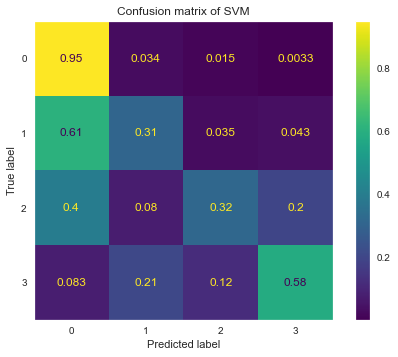

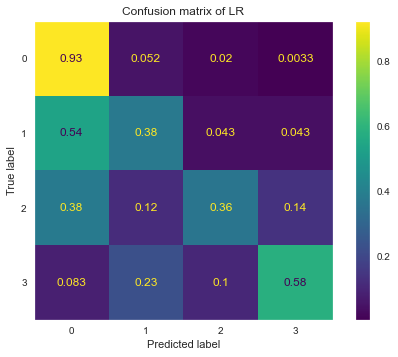

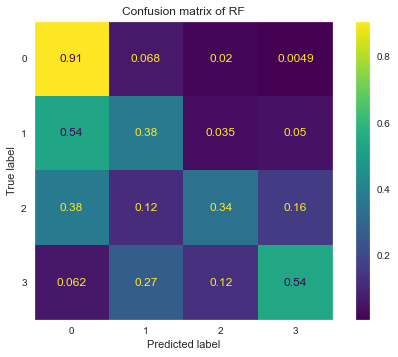

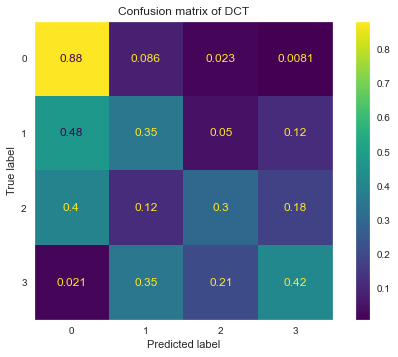

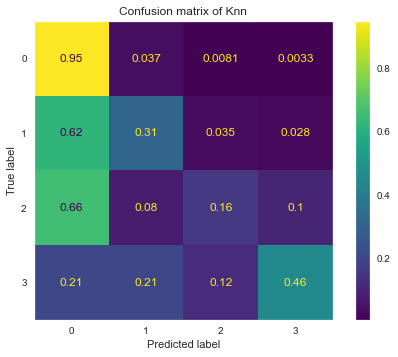

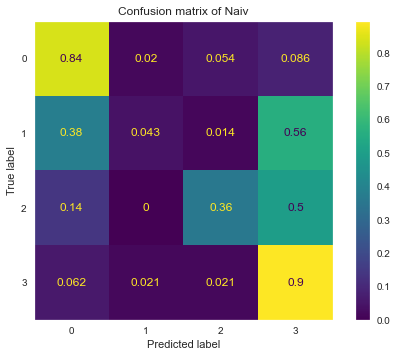

In [177]:

svm_clf = svm.LinearSVC( max_iter= 2900, random_state = 0)
lr_clf = LogisticRegression(max_iter= 2900, random_state = 0)
rf_clf = RandomForestClassifier(random_state = 0)
knn = KNeighborsClassifier(n_neighbors=13)
bayes = GaussianNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=0)
import time 
kfold = KFold(n_splits=10 ,random_state=0,shuffle = True)
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'Naiv': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train) # Fit the training data to the Model
    end = time.time()
    cv_result = cross_val_score(v, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))
    sns.set_style("dark") 

In [182]:
models_df

,SVM,LR,RF,DCT,Knn,Naiv
mean,79.853887,80.790331,79.969731,75.929670,77.248118,68.756152
std,1.926319,1.843679,2.170094,2.247189,2.048349,3.052525
time,0.489243,0.660287,0.777195,0.022006,0.003124,0.016073


What is the AUC - ROC Curve?


AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

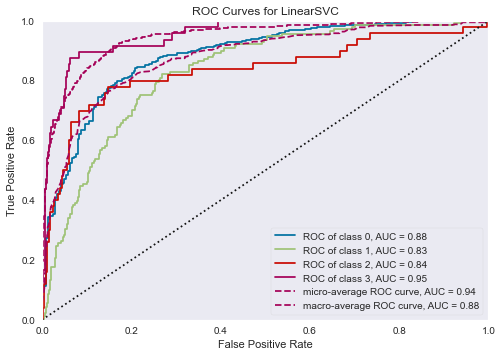

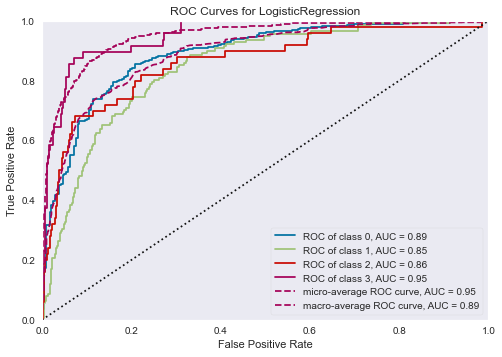

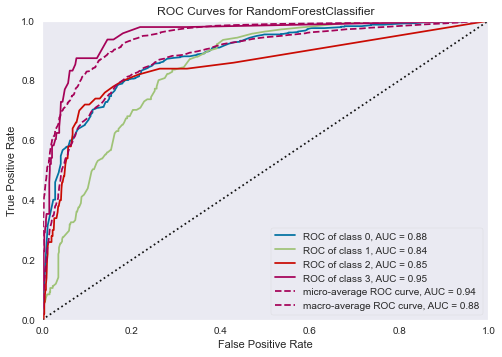

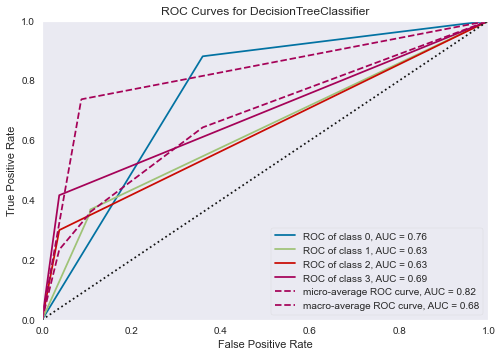

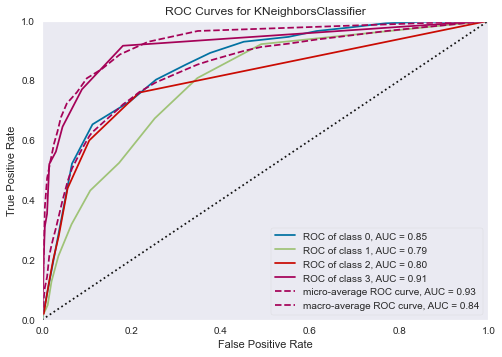

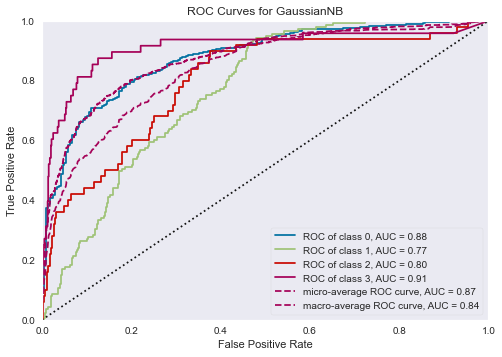

In [179]:
for k,v in models.items ( ) : 
    visualizer = ROCAUC(v)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
    g = visualizer.show()

In [180]:
for k,v in models.items():
    print(k)
    y_predict = v.predict(X_test)
    print(metrics.classification_report(y_test, y_predict, digits=3)) 

SVM
              precision    recall  f1-score   support

           0      0.841     0.948     0.891       615
           1      0.557     0.312     0.400       141
           2      0.444     0.320     0.372        50
           3      0.609     0.583     0.596        48

    accuracy                          0.786       854
   macro avg      0.613     0.541     0.565       854
weighted avg      0.758     0.786     0.763       854

LR
              precision    recall  f1-score   support

           0      0.852     0.925     0.887       615
           1      0.520     0.376     0.436       141
           2      0.439     0.360     0.396        50
           3      0.651     0.583     0.615        48

    accuracy                          0.782       854
   macro avg      0.615     0.561     0.584       854
weighted avg      0.762     0.782     0.769       854

RF
              precision    recall  f1-score   support

           0      0.851     0.907     0.878       615
           

SVM
              precision    recall  f1-score   support

           0      0.841     0.948     0.891       615
           1      0.557     0.312     0.400       141
           2      0.444     0.320     0.372        50
           3      0.609     0.583     0.596        48

    accuracy                          0.786       854
   macro avg      0.613     0.541     0.565       854
weighted avg      0.758     0.786     0.763       854

LR
              precision    recall  f1-score   support

           0      0.852     0.925     0.887       615
           1      0.520     0.376     0.436       141
           2      0.439     0.360     0.396        50
           3      0.651     0.583     0.615        48

    accuracy                          0.782       854
   macro avg      0.615     0.561     0.584       854
weighted avg      0.762     0.782     0.769       854

RF
              precision    recall  f1-score   support

           0      0.851     0.907     0.878       615
           

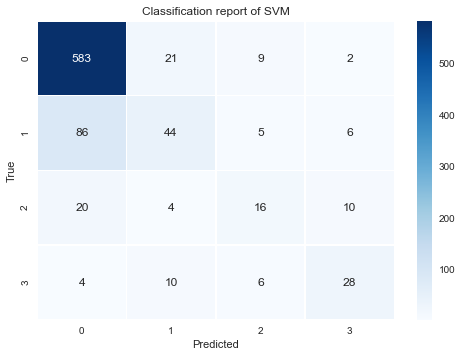

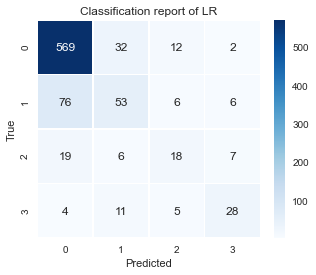

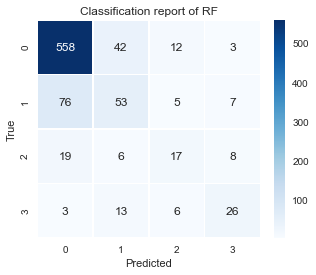

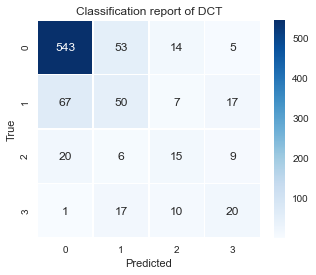

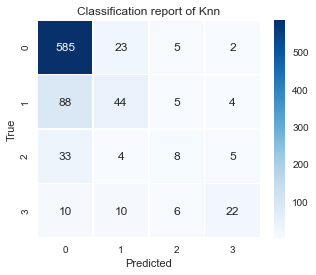

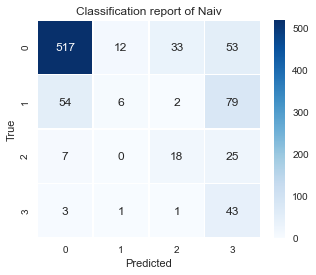

<Figure size 360x288 with 0 Axes>

In [181]:
for k,v in models.items():
    y_predict = v.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_predict)
    ax = sns.heatmap(cf_matrix, annot=True, linewidths=.5, cmap = 'Blues', fmt="")
    ax.set(xlabel='Predicted', ylabel='True')
    plt.title('Classification report of {}'.format(k))
    plt.figure(figsize=(5,4))
    
    print(k)
    print(metrics.classification_report(y_test, y_predict, digits=3))

Over Sampling our Trainig Data to improve our Recall



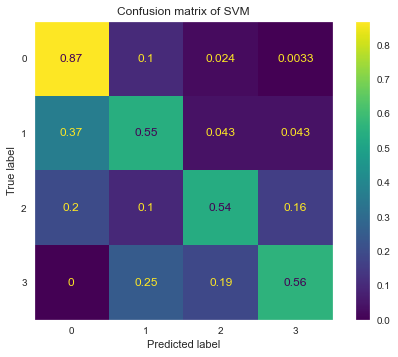

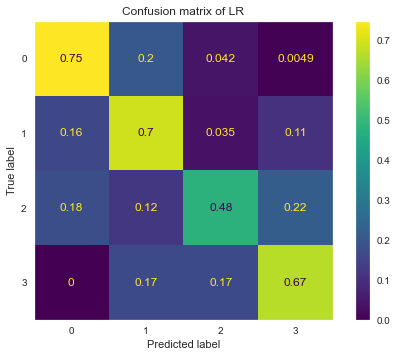

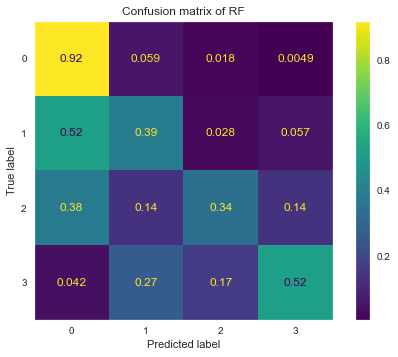

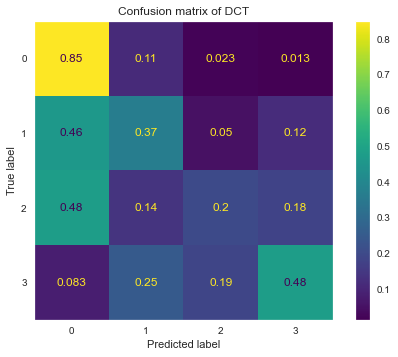

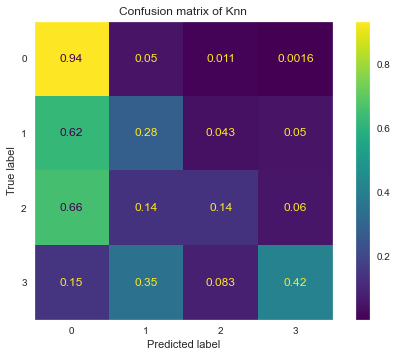

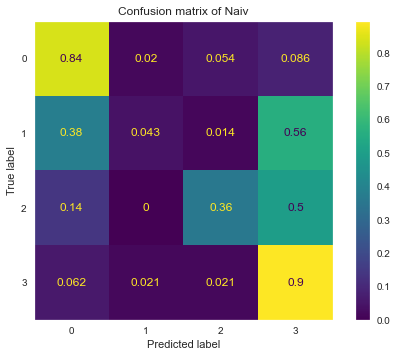

In [183]:
svm_clf = svm.LinearSVC( max_iter= 2900,class_weight = 'balanced')
lr_clf = LogisticRegression(max_iter= 2900,class_weight = 'balanced')
rf_clf = RandomForestClassifier(random_state = 5,class_weight = 'balanced')
knn = KNeighborsClassifier(n_neighbors=7)
bayes = GaussianNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=5,class_weight = 'balanced')
import time 
kfold = KFold(n_splits=10 ,random_state=0,shuffle = True)
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'Naiv': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train)
    end = time.time()
    cv_result = cross_val_score(v, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))
    